# Temperature's influence on anomalities

In this notebook I will explore if sensors in lower temperature devices have more anomalities. First , let's combine all the temperature data into one dataframe.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import glob
import statistics


In [2]:
path = r'data/temp_data'
all_files = glob.glob(path + "/*.xlsx")
dfList = []

for filename in all_files:
    frame = pd.read_excel(filename, index_col=None, header=0)
    dfList.append(frame)

df_All = pd.concat(dfList, axis=0, ignore_index=True)

Now we take a look at 10 random rows to determine if the datasets have been merged properly. Looks like they have.

In [3]:
df.sample(n=10)

,DeviceId,EventDt,Temp
5326905,M,2018-11-19 00:07:22.907,6.19
8097914,T,2021-10-26 10:59:07.490,18.51
6704189,P,2020-08-29 06:14:35.453,5.27
9986510,Z,2021-02-13 04:13:26.187,6.26
2882111,D,2021-04-24 22:29:43.023,14.18
6090649,O,2019-06-02 00:26:04.270,22.22
9694445,Y,2021-05-06 01:45:10.373,-18.47
5381519,M,2019-05-27 15:13:28.863,6.64
6922084,Q,2019-09-24 19:55:50.757,19.79
2406747,C,2019-10-28 06:26:56.213,18.53


In order to conclude if colder devices have more anomalies, we will be taking the 5 hottest and coldest devices (on average), and looking which have more anomalities.

In [4]:
hotcold = []
# Het hele zoeken van de warmste en koudste devices kan probably veel makkelijker 
# Wat ik nou doe is ik pak de mean van de temp van elk excel bestand en douw dit in een lijst, sorteer de lijst op temperatuur en pak de eerste en laatste 5
for filename in all_files:
    device = pd.read_excel(filename)
    # get data
    avg_temp = device["Temp"].mean()
    device = device["DeviceId"].iloc[0]
    # new entry to list
    hotcold.append(
        {
            "DeviceId": device,
            "Temp": avg_temp
        }
    )
    # debug
    # print(avg_temp)
    # print(device["DeviceId"].iloc[0])

df_hotcold = pd.DataFrame(hotcold)
    

Now we just sort the output by temperature, to see which devices are the coldest and the hottest. And divide them into the hottest 5 and coldest 5. Now we can see which devices are the coldest and hottest.

In [5]:
df_coldest = df_hotcold.sort_values(by=["Temp"]).head(5)
df_hottest = df_hotcold.sort_values(by=["Temp"]).tail(5)

print("coldest devices: ")
print(df_coldest["DeviceId"])

print("hottest devices: ")
print(df_hottest["DeviceId"])

coldest devices: 
14     K
11     H
8      E
1     AA
27     Y
Name: DeviceId, dtype: object
hottest devices: 
23     U
17     O
19     Q
9      F
3     AC
Name: DeviceId, dtype: object


Let's see if we can find the outliers of device K. We will be using IQR to find our outliers.

In [6]:
#loading in K
df_K = pd.read_excel('data/temp_data/data_K.xlsx')

In [11]:
#First step is to sort the dataset by temperature (ascending)
K_sorted = sorted(df_K["Temp"])
#Now we can split the dataset up into quartiles
q1, q3= np.percentile(K_sorted,[25,75])
#get iqr
iqr = q3 - q1
#determine the lower and upper bounds 
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr) 

print(lower_bound)
print(upper_bound)

-28.955000000000005
-24.354999999999997


Let's plot K. The outliers are shown as the red dots. 

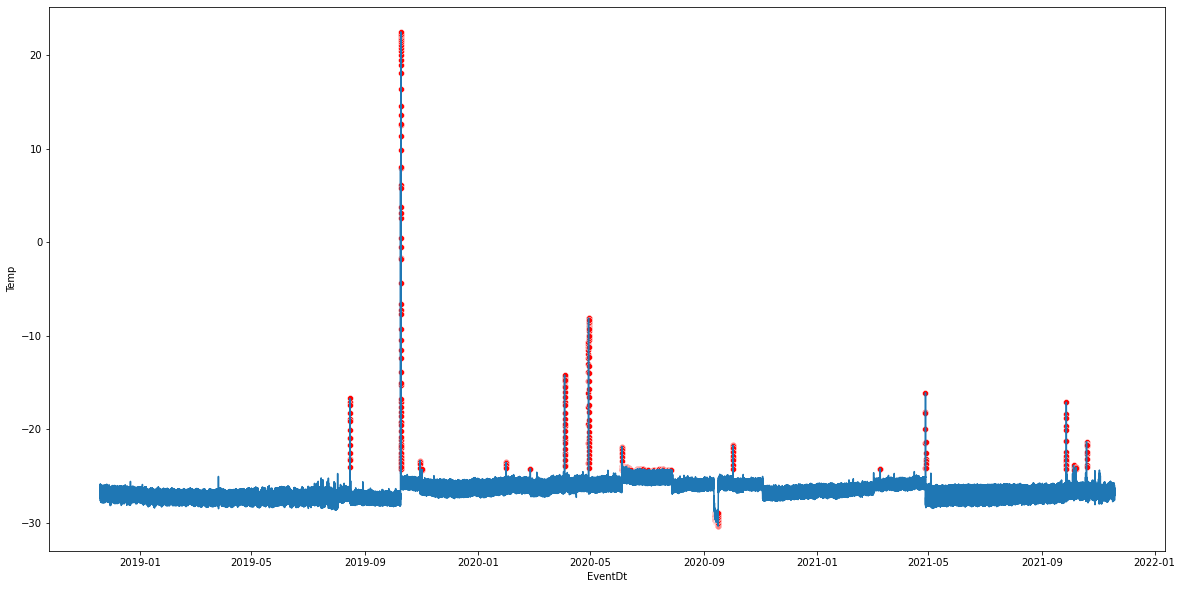

In [12]:
sns.lineplot(x="EventDt", y="Temp", data=df_K)
# make dataframe containing only the outliers
outliers_K = df_K.loc[((df_K["Temp"] > upper_bound) == True) | ((df_K["Temp"] < lower_bound) == True)]
sns.scatterplot(x="EventDt", y="Temp", data=outliers_K, c=['r'])

plt.gcf().set_size_inches(20, 10)

In [16]:
len(outliers_K)

1423

Let's find the amount of outliers for the other datasets using the same method.

In [17]:
#loading in the data
df_H = pd.read_excel('data/temp_data/data_H.xlsx')
df_E = pd.read_excel('data/temp_data/data_E.xlsx')
df_AA = pd.read_excel('data/temp_data/data_AA.xlsx')
df_Y = pd.read_excel('data/temp_data/data_Y.xlsx')

We will be creating a function which will return the number of outliers in a given dataframe.

In [21]:
def getOutliers(df):
    #First step is to sort the dataset by temperature (ascending)
    sorted_df = sorted(df["Temp"])
    #Now we can split the dataset up into quartiles
    q1, q3= np.percentile(sorted_df,[25,75])
    #get iqr
    iqr = q3 - q1
    #determine the lower and upper bounds 
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr) 
    outliers = df.loc[((df["Temp"] > upper_bound) == True) | ((df["Temp"] < lower_bound) == True)]
    return len(outliers)


Now let's use the function to get the number of outliers in each  of the coldest devices. We will be putting them in a list.

In [34]:
outliers_coldest = []
outliers_coldest.append(getOutliers(df_H))
outliers_coldest.append(getOutliers(df_E))
outliers_coldest.append(getOutliers(df_AA))
outliers_coldest.append(getOutliers(df_Y))
outliers_coldest.append(len(outliers_K))

Now we will be doing the same for the hottest devices. We can use the same function for this.

In [28]:
#loading in hottest devices
df_U = pd.read_excel('data/temp_data/data_U.xlsx')
df_O = pd.read_excel('data/temp_data/data_O.xlsx')
df_Q = pd.read_excel('data/temp_data/data_Q.xlsx')
df_F = pd.read_excel('data/temp_data/data_F.xlsx')
df_AC = pd.read_excel('data/temp_data/data_AC.xlsx')

In [35]:
outliers_hottest = []
outliers_hottest.append(getOutliers(df_U))
outliers_hottest.append(getOutliers(df_O))
outliers_hottest.append(getOutliers(df_Q))
outliers_hottest.append(getOutliers(df_F))
outliers_hottest.append(getOutliers(df_AC))


Now we can compare the mean amount of outliers.

In [37]:
print("Average outliers coldest 5 devices:", statistics.mean(outliers_coldest))
print("Mean outliers hottest 5 devices:", statistics.mean(outliers_hottest))

Average outliers coldest 5 devices: 15608.2
Mean outliers hottest 5 devices: 35018.8
